Social Network ADS

In [3]:
# Logistic Regression

# Mengimpor library yang diperlukan
import numpy as np  # Library untuk komputasi numerik
import matplotlib.pyplot as plt  # Library untuk membuat visualisasi grafik
import pandas as pd  # Library untuk manipulasi data dan analisis

In [4]:
# Mengimpor dataset
dataset = pd.read_csv('Social_Network_Ads.csv')  # Membaca dataset dari file CSV
X = dataset.iloc[:, :-1].values  # Memisahkan fitur (semua kolom kecuali kolom terakhir)
y = dataset.iloc[:, -1].values  # Memisahkan target (kolom terakhir)

In [5]:
# Membagi dataset menjadi Training set dan Test set
from sklearn.model_selection import train_test_split  # Mengimpor fungsi untuk membagi dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# Membagi data menjadi Training set (75%) dan Test set (25%) dengan random_state agar hasilnya konsisten

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler  # Mengimpor StandardScaler untuk standardisasi data
sc = StandardScaler()  # Membuat objek StandardScaler
X_train = sc.fit_transform(X_train)  # Melakukan fit dan transformasi pada Training set
X_test = sc.transform(X_test)  # Melakukan transformasi pada Test set (fit hanya dilakukan pada training)

In [7]:
# Melatih model Logistic Regression pada Training set
from sklearn.linear_model import LogisticRegression  # Mengimpor kelas LogisticRegression
classifier = LogisticRegression(random_state=0)  # Membuat model Logistic Regression dengan random_state agar konsisten
classifier.fit(X_train, y_train)  # Melatih model menggunakan Training set

LogisticRegression(random_state=0)

In [8]:
# Memprediksi hasil baru
new_prediction = classifier.predict(sc.transform([[30, 87000]]))  # Memprediksi hasil untuk input baru (umur 30, gaji 87000)

In [9]:
# Memprediksi hasil Test set
y_pred = classifier.predict(X_test)  # Memprediksi hasil untuk Test set
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
# Menampilkan hasil prediksi dan nilai aktual berdampingan untuk perbandingan

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


In [10]:
# Membuat Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score  # Mengimpor fungsi confusion_matrix dan accuracy_score
cm = confusion_matrix(y_test, y_pred)  # Membuat Confusion Matrix untuk mengevaluasi performa model
print(cm)  # Menampilkan Confusion Matrix
accuracy = accuracy_score(y_test, y_pred)  # Menghitung akurasi model
print(f'Akurasi Model: {accuracy}')  # Menampilkan akurasi model

[[65  3]
 [ 8 24]]
Akurasi Model: 0.89


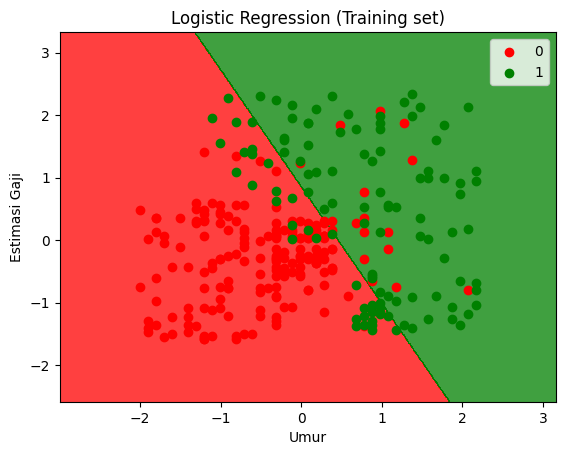

In [11]:
# Visualisasi hasil Training set
from matplotlib.colors import ListedColormap
# Mengimport fungsi untuk pembuatan peta warna khusus
X_set, y_set = X_train, y_train  # Mengambil Training set
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# Membuat grid untuk background warna
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# Membuat decision boundary
plt.xlim(X1.min(), X1.max())  # Membatasi sumbu X pada plot
plt.ylim(X2.min(), X2.max())  # Membatasi sumbu Y pada plot

# Membuat scatter plot untuk masing-masing kelas
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Logistic Regression (Training set)')  # Menambahkan judul plot
plt.xlabel('Umur')  # Menambahkan label sumbu X
plt.ylabel('Estimasi Gaji')  # Menambahkan label sumbu Y
plt.legend()  # Menambahkan legenda untuk membedakan kelas
plt.show()  # Menampilkan plot

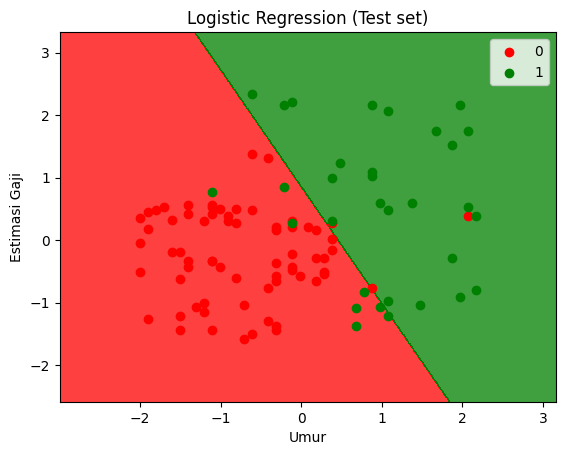

In [12]:
# Visualisasi hasil Test set
X_set, y_set = X_test, y_test  # Mengambil Test set
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# Membuat grid untuk background warna
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))  # Membuat decision boundary
plt.xlim(X1.min(), X1.max())  # Membatasi sumbu X pada plot
plt.ylim(X2.min(), X2.max())  # Membatasi sumbu Y pada plot

# Membuat scatter plot untuk masing-masing kelas
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Logistic Regression (Test set)')  # Menambahkan judul plot
plt.xlabel('Umur')  # Menambahkan label sumbu X
plt.ylabel('Estimasi Gaji')  # Menambahkan label sumbu Y
plt.legend()  # Menambahkan legenda untuk membedakan kelas
plt.show()  # Menampilkan plot


Iris

In [13]:
# Mengimpor library yang diperlukan
import numpy as np  # Library untuk komputasi numerik
import matplotlib.pyplot as plt  # Library untuk membuat visualisasi grafik
import pandas as pd  # Library untuk manipulasi data dan analisis

In [14]:
# Mengimpor dataset
# Membaca dataset Iris dari file CSV
# Dataset ini memiliki fitur-fitur panjang dan lebar dari sepal dan petal untuk tiga jenis bunga iris
# serta label (target) berupa jenis bunga iris (Setosa, Versicolour, atau Virginica)
dataset = pd.read_csv('Iris.csv')  # Membaca dataset dari file CSV
X = dataset.iloc[:, 1:-1].values  # Memisahkan fitur (kolom 1 hingga kolom sebelum terakhir)
y = dataset.iloc[:, -1].values  # Memisahkan target (kolom terakhir)

In [15]:
# Membagi dataset menjadi Training set dan Test set
from sklearn.model_selection import train_test_split  # Mengimpor fungsi untuk membagi dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# Membagi data menjadi Training set (75%) dan Test set (25%) dengan random_state agar hasilnya konsisten

In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler  # Mengimpor StandardScaler untuk standardisasi data
sc = StandardScaler()  # Membuat objek StandardScaler
X_train = sc.fit_transform(X_train)  # Melakukan fit dan transformasi pada Training set
X_test = sc.transform(X_test)  # Melakukan transformasi pada Test set (fit hanya dilakukan pada training)


In [17]:
# Melatih model K-NN pada Training set
from sklearn.neighbors import KNeighborsClassifier  # Mengimpor kelas KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # Membuat model K-NN dengan k=5 dan menggunakan jarak Euclidean
classifier.fit(X_train, y_train)  # Melatih model menggunakan Training set


KNeighborsClassifier()

In [18]:
# Memprediksi hasil baru
new_prediction = classifier.predict(sc.transform([[5.1, 3.5, 1.4, 0.2]]))  # Memprediksi jenis bunga berdasarkan fitur-fitur yang diberikan
print(f'Prediksi untuk input [5.1, 3.5, 1.4, 0.2]: {new_prediction[0]}')  # Menampilkan hasil prediksi

Prediksi untuk input [5.1, 3.5, 1.4, 0.2]: Iris-setosa


In [19]:
# Memprediksi hasil Test set
y_pred = classifier.predict(X_test)  # Memprediksi hasil untuk Test set
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
# Menampilkan hasil prediksi dan nilai aktual berdampingan untuk perbandingan

[['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']


In [20]:
# Membuat Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score  # Mengimpor fungsi confusion_matrix dan accuracy_score
cm = confusion_matrix(y_test, y_pred)  # Membuat Confusion Matrix untuk mengevaluasi performa model
print('Confusion Matrix:')
print(cm)  # Menampilkan Confusion Matrix
accuracy = accuracy_score(y_test, y_pred)  # Menghitung akurasi model
print(f'Akurasi Model: {accuracy}')  # Menampilkan akurasi model

Confusion Matrix:
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Akurasi Model: 0.9736842105263158


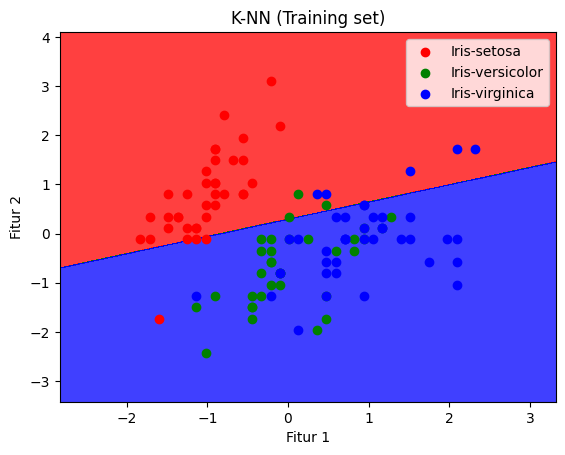

In [21]:
# Visualisasi hasil Training set (menggunakan dua fitur pertama untuk visualisasi 2D)
from matplotlib.colors import ListedColormap  # Mengimpor fungsi untuk pembuatan peta warna khusus

X_set, y_set = X_train[:, :2], y_train  # Mengambil dua fitur pertama dari Training set untuk visualisasi
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Membuat grid untuk background warna
Z = classifier.predict(sc.transform(np.c_[X1.ravel(), X2.ravel(), np.zeros_like(X1.ravel()), np.zeros_like(X1.ravel())]))

# Jika Z adalah label string, ubah menjadi nilai numerik
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Z = le.fit_transform(Z)
Z = Z.reshape(X1.shape)

# Membuat decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())  # Membatasi sumbu X pada plot
plt.ylim(X2.min(), X2.max())  # Membatasi sumbu Y pada plot

# Membuat scatter plot untuk masing-masing kelas
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green', 'blue'))(i), label=j)

# Menambahkan judul, label sumbu, dan legenda
plt.title('K-NN (Training set)')  # Menambahkan judul plot
plt.xlabel('Fitur 1')  # Menambahkan label sumbu X
plt.ylabel('Fitur 2')  # Menambahkan label sumbu Y
plt.legend()  # Menambahkan legenda untuk membedakan kelas
plt.show()  # Menampilkan plot

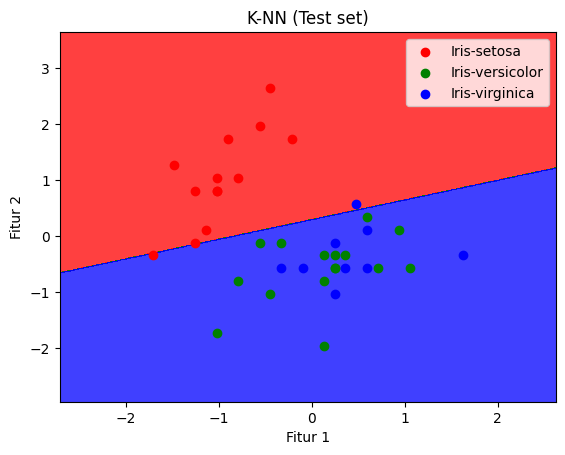

In [22]:
# Visualisasi hasil Test set (menggunakan dua fitur pertama untuk visualisasi 2D)
from matplotlib.colors import ListedColormap  # Mengimpor fungsi untuk pembuatan peta warna khusus

X_set, y_set = X_test[:, :2], y_test  # Mengambil dua fitur pertama dari Test set untuk visualisasi
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Membuat grid untuk background warna
Z = classifier.predict(sc.transform(np.c_[X1.ravel(), X2.ravel(), np.zeros_like(X1.ravel()), np.zeros_like(X1.ravel())]))

# Assuming your labels are 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
# Create a dictionary for mapping
label_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

# Convert the predicted labels to numbers
Z = np.array([label_map[label] for label in Z])
Z = Z.reshape(X1.shape)

# Membuat decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())  # Membatasi sumbu X pada plot
plt.ylim(X2.min(), X2.max())  # Membatasi sumbu Y pada plot

# Membuat scatter plot untuk masing-masing kelas
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green', 'blue'))(i), label=j)

# Menambahkan judul, label sumbu, dan legenda
plt.title('K-NN (Test set)')  # Menambahkan judul plot
plt.xlabel('Fitur 1')  # Menambahkan label sumbu X
plt.ylabel('Fitur 2')  # Menambahkan label sumbu Y
plt.legend()  # Menambahkan legenda untuk membedakan kelas
plt.show()  # Menampilkan plot
